# Week 1 - Tasks

- **Data Source:** `yfinance`
- **Assets:** `AAPL`, `MSFT`, `GOOG`, `AMZN`, `TSLA` (and `NVDA` for Task 5)
- **Timeframes:**
  * **Long Term:** `start="2015-01-01", end="2024-01-01"`
  * **Medium Term:** `start="2020-01-01", end="2024-01-01"` (Includes COVID crash)

The goal for this week is to gain familiarity with financial data, analyze common trends, learn standard library functions, and touch upon the underlying theory.

## Task 1 - Setup
* Fetch **Long Term** historical data for the 5 assets.
* Extract the `Adjusted Close` values.
    * *Note: Check for missing values or empty rows and handle them (drop or fill).*
* Use `df.describe()` to extract key summary statistics.
* Extract the **Medium Term** data as well for later tasks.

In [11]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

assets = ["AAPL","MSFT","GOOG","AMZN","TSLA"]

long_data = yf.download(assets,start="2015-01-01", end="2024-01-01")["Close"]
long_data.dropna(inplace=True)

mid_data = yf.download(assets,start="2020-01-01", end="2024-01-01")["Close"]
mid_data.dropna(inplace=True)

long_data.describe()

/tmp/ipykernel_14566/3795110357.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  long_data = yf.download(assets,start="2015-01-01", end="2024-01-01")["Close"]
[*********************100%***********************]  5 of 5 completed
/tmp/ipykernel_14566/3795110357.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  mid_data = yf.download(assets,start="2020-01-01", end="2024-01-01")["Close"]
[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,AMZN,GOOG,MSFT,TSLA
count,2264.000000,2264.000000,2264.000000,2264.000000,2264.000000
mean,81.394710,91.950540,73.063479,154.516908,102.886245
std,55.990879,48.654536,36.298158,99.658479,110.936400
min,20.604076,14.347500,24.377235,34.437164,9.578000
25%,32.814700,44.303625,41.515248,59.182494,16.670500
50%,51.220840,90.691998,59.376665,127.528793,23.160666
75%,139.017654,133.230000,104.133976,244.037395,214.290005
max,196.256592,186.570496,149.587067,377.077850,409.970001


## Task 2 - Basic Trends
* Select **one asset** and using the **Medium Term** data, compute:
    * **Returns:** 1-day, 5-day, and 20-day simple returns.
    * **Log Returns:** 1-day, 5-day, and 20-day log returns.
    * **Volatility:** 5-day, 20-day, and 60-day rolling standard deviation (volatility) of the log returns.
* **Plotting:**
    * Plot the price and the 20-day moving average on one chart.
    * Plot the 1-day log returns on a separate chart.
    * Plot the rolling volatilities on a third chart.
    * *Analysis:* What trends do you observe? Does high volatility correlate with price drops?

* **Bonus (Long Term Data):**
    * Create a scatter plot of `|Daily Return|` vs `Volume`. Is there a relationship?
    * Group returns and volatility by **Month** (e.g., all Januaries, all Februaries) and plot the averages. Is there a "seasonal" effect?

In [16]:
asset = "AAPL"
price = mid_data[asset]

return1 = price.pct_change()
return5 = price.pct_change(5)
return20 = price.pct_change(20)

log_return1 = np.log(price / price.shift(1))
log_return5 = np.log(price / price.shift(5))
log_return20 = np.log(price / price.shift(20))

vol_5 = log_return1.rolling(5).std()
vol_20 = log_return1.rolling(20).std()
vol_60 = log_return1.rolling(60).std()

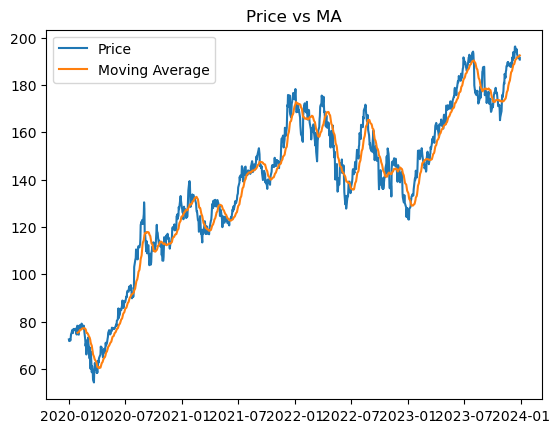

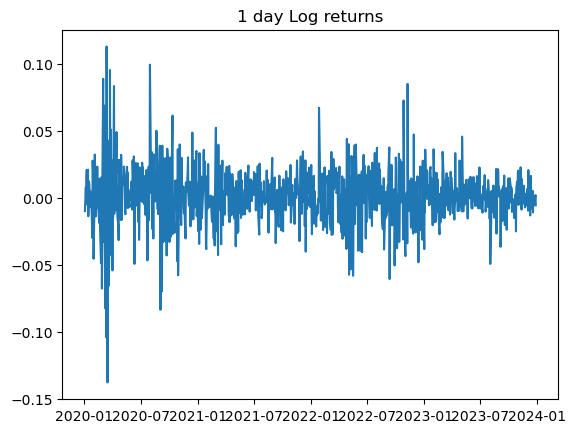

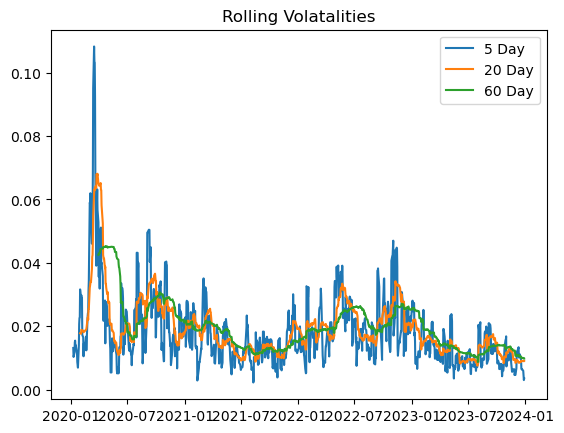

In [18]:

# Plotting

plt.plot(price, label="Price")
plt.plot(price.rolling(20).mean(), label="Moving Average")
plt.title("Price vs MA")
plt.legend()
plt.show()

plt.plot(log_return1)
plt.title("1 day Log returns")
plt.show()

plt.plot(vol_5, label="5 Day")
plt.plot(vol_20, label="20 Day")
plt.plot(vol_60, label="60 Day")
plt.title("Rolling Volatalities")
plt.legend()
plt.show()


# Yes it is getting correlated as high volatality refering to price drop

/tmp/ipykernel_14566/3970914687.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  full = yf.download(asset, start="2015-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


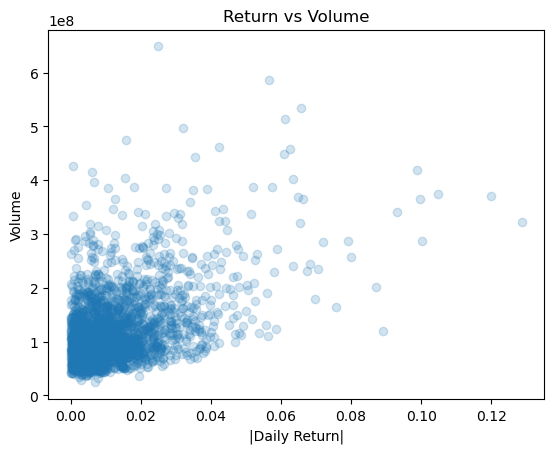

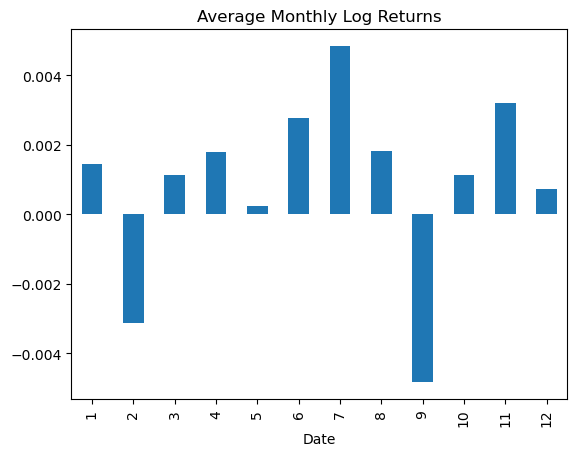

In [ ]:
# Bonus

long_data_aapl = yf.download(asset, start="2015-01-01", end="2024-01-01")
daily_ret = long_data_aapl["Close"].pct_change().abs()

plt.scatter(daily_ret, long_data_aapl["Volume"],alpha=0.2)
plt.xlabel("|Daily Return|")
plt.ylabel("Volume")
plt.title("Return vs Volume")
plt.show()

monthly = log_return1.groupby(log_return1.index.month).mean()
monthly.plot(kind="bar", title="Average Monthly Log Returns")
plt.show()


## Task 3 - Stationarity
* Select **one asset** (Long Term).
* Compute the **Rolling Mean** and **Rolling Standard Deviation** of log returns with window sizes `20, 60, 120`.
* Plot them and visually inspect.
    * Does the mean stay constant? (Stationary mean)
    * Does the variance stay constant? (Stationary variance)
* Run an **Augmented Dickey-Fuller (ADF) Test** on the log return series.
    * Library: `from statsmodels.tsa.stattools import adfuller`
    * *Goal:* Interpret the p-value. The Null Hypothesis ($H_0$) is that the series is non-stationary (has a unit root). If p-value < 0.05, we reject $H_0$.
    * For learning about hypothesis testing and p-value you can refer to CS215 slides or other standard resources mentioned in READMEs.

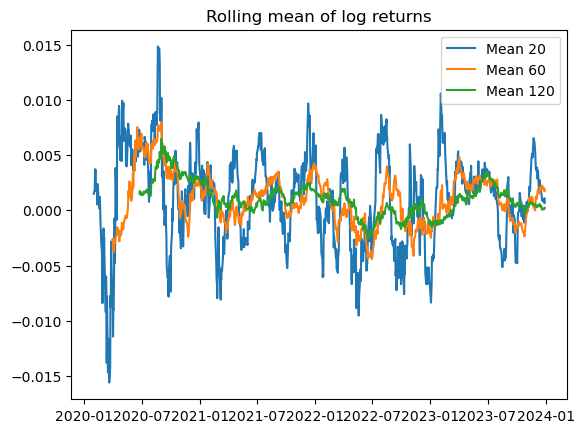

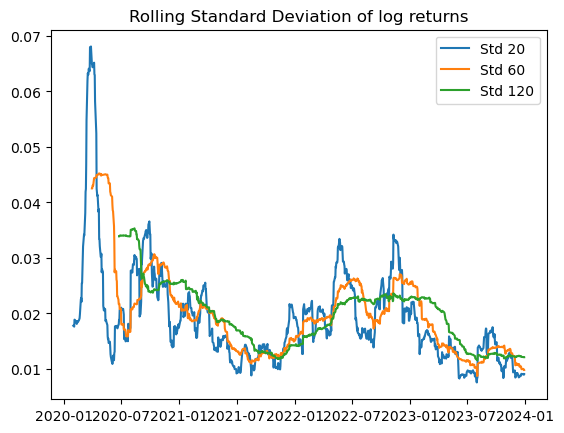

(-10.09192989924322, 1.1162884693987625e-17, 8, 996, {'1%': -3.4369325637409154, '5%': -2.8644462162311934, '10%': -2.568317409920808}, -4814.6113233155975)


In [28]:
window = [20,60,120]

for w in window:
    plt.plot(log_return1.rolling(w).mean(), label=f"Mean {w}")

plt.legend()
plt.title("Rolling mean of log returns")
plt.show()

for w in window:
    plt.plot(log_return1.rolling(w).std(), label=f"Std {w}")

plt.legend()
plt.title("Rolling Standard Deviation of log returns")
plt.show()

from statsmodels.tsa.stattools import adfuller
print(adfuller(log_return1.dropna()))


## Task 4 - Volatility Regimes
We try to study the trend in volatility more deeply. From the ACF/PACF plot we know that volatility tends to cluster that is the market is either in a high volatility state (greater daily fluctuations) or low volatility state (stable prices, quiet markets).

Formally we can treat volatility as a *conditional standard deviation of returns*, conditioned on the history observed so far. We *cannot* predict *true* volatility for a given day based on the single return value, hence we try to estimate it using the past information. For this we look at two indicators of volatility:

1.  **Rolling Window Volatility:** Simple Moving Average (SMA) of standard deviation.
2.  **EWMA Volatility:** Exponentially Weighted Moving Average. This gives more weight to recent events. It is given by $\sigma_t^2 = (1-\lambda)r_t^2 + \lambda \sigma_{t-1}^2$.

**Steps:**
* Pick an asset and use data covering the **Feb-Mar 2020 COVID crash**.
* Compute two volatility estimates on the Log Returns:
    1.  **Rolling 20-day Volatility:** Standard deviation over a 20-day window.
    2.  **EWMA Volatility (RiskMetrics):** Use a decay factor $\lambda = 0.94$.
        * *Hint:* In pandas `df.ewm()`, the parameter `alpha` corresponds to $1 - \lambda$. So, use `alpha=0.06`.
* **Analysis:**
    * Plot both estimates on the same chart.
    * Which is smoother?
    * Which estimator reacts faster to the sudden crash in March 2020?
    * Which one would you prefer for risk management?
* **Regime Detection:** Compute the 60th percentile of your EWMA volatility series. Shade the regions on the plot where volatility exceeds this level.

* **Bonus:** A good volatility model "standardizes" the returns well. Calculate $z_t = r_t / \hat{\sigma}_t$. If the model is good, $z_t$ should have $Var \approx 1$. Check the variance of $z_t$ and plot its histogram.

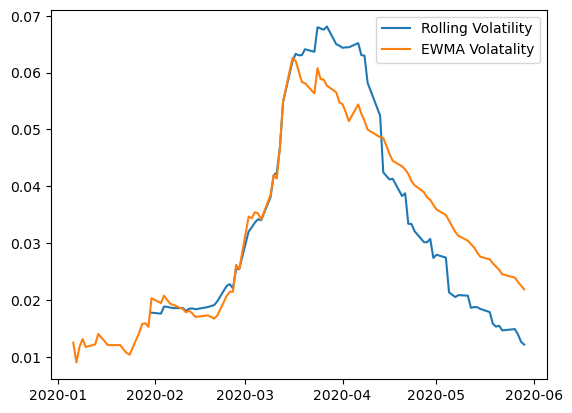

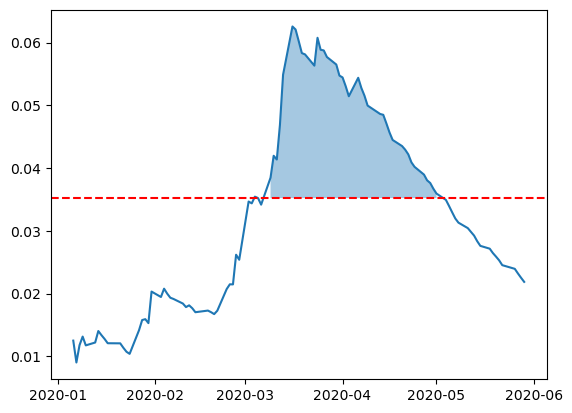

1.0057715154014972

In [34]:
covid_data = log_return1["2020-01":"2020-05"]

roll_vol = covid_data.rolling(20).std()

ewma_vol = covid_data.ewm(alpha=0.06).std()

plt.plot(roll_vol, label="Rolling Volatility")
plt.plot(ewma_vol, label="EWMA Volatality")
plt.legend()
plt.show()

threshold = ewma_vol.quantile(0.6)

plt.plot(ewma_vol)
plt.axhline(threshold, color="red", linestyle="--")
plt.fill_between(ewma_vol.index, ewma_vol, threshold, where=ewma_vol>threshold, alpha=0.4)
plt.show()

#bonus
z = covid_data/ewma_vol
z.var()
# It comes out near to 1 which means this is a good estimate

## Task 5 - Time Horizons and the "Normal" Illusion
Short-term markets are noisy and dangerous (fat tails), while long-term data looks smoother. We can prove this statistically using **Skew** and **Kurtosis**.

**Theory:**
* **Skewness:** Measures asymmetry. (Negative skew = frequent small gains, few extreme losses).
* **Kurtosis:** Measures "tailedness". (High kurtosis = frequent extreme events/crashes).
* **Normal Distribution:** Skew $\approx 0$, Kurtosis $\approx 3$ (or Excess Kurtosis $\approx 0$).

**Steps:**
1.  Take your **Long Term** data for one asset (e.g., NVDA or TSLA).
2.  Resample the prices to get **Weekly** and **Monthly** closes.
    * Use `df['Adj Close'].resample('W').last()` and `...resample('M').last()`.
3.  Compute Log Returns for all three series: Daily, Weekly, Monthly.
4.  **The Test:**
    * Calculate **Skew** and **Kurtosis** for each of the three return series.
    * *Question:* How do these values change as the time horizon increases? Do they get closer to 0 and 3?
5.  **Visualization:**
    * Plot the **Histograms** of the Daily returns vs. Monthly returns on the same plot.
    * *Tip:* You will need to standardize them (subtract mean, divide by std dev) to overlay them meaningfully.
    * *Observation:* Look at the tails. Which one has "fatter" tails (more extreme outliers)?

**Key Takeaway:**
Daily returns often violate the "Normal Distribution" assumption used in many financial models. Long-term returns fit it better. This is called *Aggregational Gaussianity*.

**Bonus:** This is a direct application of a simple yet well-known result in asymptotic statistics. Can you find out what it is and state how it explains this observation?

/tmp/ipykernel_14566/1036245114.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nvda_data = yf.download("NVDA", start="2015-01-01", end="2024-01-01")["Close"].squeeze()
[*********************100%***********************]  1 of 1 completed


Daily Skew:  0.2100048105732418 , Kurtosis:  7.532071581585781
Weekly Skew:  0.10245791931100144 , Kurtosis:  1.3913366792900317
Monthly Skew:  -0.5604488340572841 , Kurtosis:  0.6895215561689709


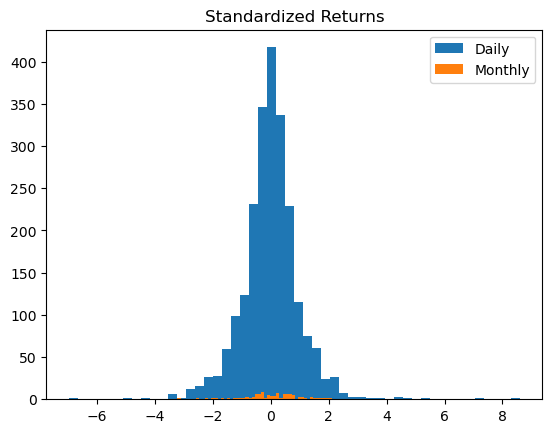

In [53]:
nvda_data = yf.download("NVDA", start="2015-01-01", end="2024-01-01")["Close"].squeeze() 

nvda_data_weekly = nvda_data.resample('W').last() 
nvda_data_monthly = nvda_data.resample('ME').last()

daily_log = np.log(nvda_data/nvda_data.shift(1)).dropna() 
weekly_log = np.log(nvda_data_weekly/nvda_data_weekly.shift(1)).dropna() 
monthly_log = np.log(nvda_data_monthly/nvda_data_monthly.shift(1)).dropna() 

print("Daily Skew: ", daily_log.skew(), ", Kurtosis: ", daily_log.kurtosis()) 
print("Weekly Skew: ", weekly_log.skew(), ", Kurtosis: ", weekly_log.kurtosis()) 
print("Monthly Skew: ", monthly_log.skew(), ", Kurtosis: ", monthly_log.kurtosis()) 

plt.hist((daily_log-daily_log.mean())/daily_log.std(), bins=50, label="Daily") 
plt.hist((monthly_log-monthly_log.mean())/monthly_log.std(), bins=50, label="Monthly") 
plt.legend() 
plt.title("Standardized Returns") 
plt.show()

## Task 6 - Smart investing
Calculate how many **RTX 4090s** (approx. price $1,600$) you could afford *today* if you had invested **$1,000** in NVIDIA on the day you were born.

In [57]:
birth_date = "2005-09-28"
nvda = yf.download("NVDA", start=birth_date)["Close"].squeeze()

initial_price = nvda.iloc[0]
current_price = nvda.iloc[-1]

shares = 1000 / initial_price
current_value = shares * current_price

rtx_price = 1600
num_rtx = current_value / rtx_price

initial_price, current_price, current_value, num_rtx


/tmp/ipykernel_14566/2023871610.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nvda = yf.download("NVDA", start=birth_date)["Close"].squeeze()
[*********************100%***********************]  1 of 1 completed


(0.25434544682502747,
 180.92999267578125,
 711355.3434288482,
 444.59708964303013)